# Life Expectancy By Country

Over the course of the past few centuries, technological and medical advancements have helped increase the life expectancy of humans. However, as of now, the average life expectancy of humans varies depending on what country you live in.

In this project, we will investigate a dataset containing information about the average life expectancy in 158 different countries. We will specifically look at how a country's economic success might impact the life expectancy in that area.

## 1. Access the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("country_data.csv")
print(data.head())


               Country  Life Expectancy          GDP
0          Afghanistan         58.19375   340.015425
1              Albania         75.15625  2119.726679
2              Algeria         73.61875  2847.853392
3               Angola         49.01875  1975.143045
4  Antigua and Barbuda         75.05625  9759.305728


Let's isolate the column that contains the life expectancy and store it in a variable named `life_expectancy`. 

In [3]:
life_expectancy = data['Life Expectancy']

## 2. Find the Quantiles

We can now use NumPy functions on that column! Let's use the `np.quantile()` function to find the quartiles of `life_expectancy`. Store the result in a variable named `life_expectancy_quartiles` and print the results.

In [4]:
life_expectancy_quartiles = np.quantile(life_expectancy, [0.25, 0.5, 0.75])
print('The quartiles of Life Expectancy are respectively ' + str(life_expectancy_quartiles))

The quartiles of Life Expectancy are respectively [62.325     72.525     75.4421875]


The histogram of Life Expectancy will look like this:

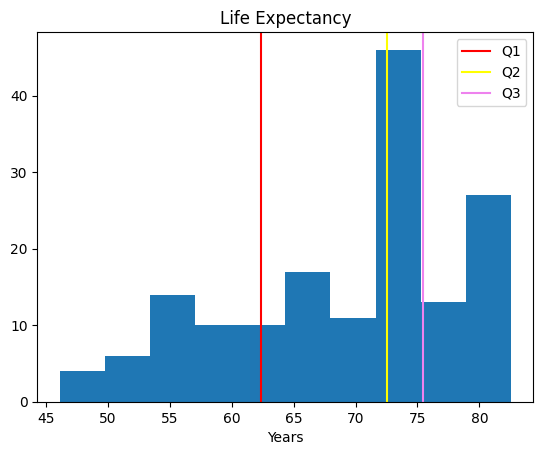

In [13]:
label_list = ['Q1', 'Q2', 'Q3']
plt.hist(life_expectancy)

plt.axvline(x=np.quantile(life_expectancy, 0.25), c = 'red')
plt.axvline(x=np.quantile(life_expectancy, 0.5), c = 'yellow')
plt.axvline(x=np.quantile(life_expectancy, 0.75), c = 'violet')
plt.title("Life Expectancy")
plt.xlabel("Years")
plt.legend(label_list)
plt.show()

We will find out in which quartile Spain is located.

In [6]:
spain_life_expectancy = data.loc[data['Country'] == 'Spain']['Life Expectancy']
print(spain_life_expectancy)

133    82.06875
Name: Life Expectancy, dtype: float64


**Spain** will fall into Q4.

## 3. Splitting the Data by GDP

GDP is a measure of a country's wealth. Let's now use the GDP data to see if life expectancy is affected by this value. Let's split the data into two groups based on GDP. If we find the median GDP, we can create two datasets for "low GDP countries" and "high GDP countries".

In [7]:
gdp = data['GDP']
gdp_median = np.median(gdp)
print(gdp_median)

low_gdp = data[data['GDP'] <= gdp_median]
high_gdp = data[data['GDP'] > gdp_median]

2938.0781155


Now that we've split the data based on the GDP, let's see how the life expectancy of each group compares to each other finding looking at their respectives 'Life Expectancy' quartiles.

In [14]:
low_gdp_quartiles = np.quantile(low_gdp['Life Expectancy'], [0.25, 0.5, 0.75])
high_gdp_quartiles = np.quantile(high_gdp['Life Expectancy'], [0.25, 0.5, 0.75])

print('The quartiles of Life Expectancy in the low GDP group are respectively ' + str(low_gdp_quartiles))
print('The quartiles of Life Expectancy in the high GDP group are respectively ' + str(high_gdp_quartiles))

The quartiles of Life Expectancy in the low GDP group are respectively [56.3375  64.34375 71.7375 ]
The quartiles of Life Expectancy in the high GDP group are respectively [72.965625 75.15625  80.521875]


## 4. Histogram and Conclusions

By looking at the quantiles, we can get a sense of the spread and central tendency of these two datasets. But let's plot a histogram of each dataset to really compare them.

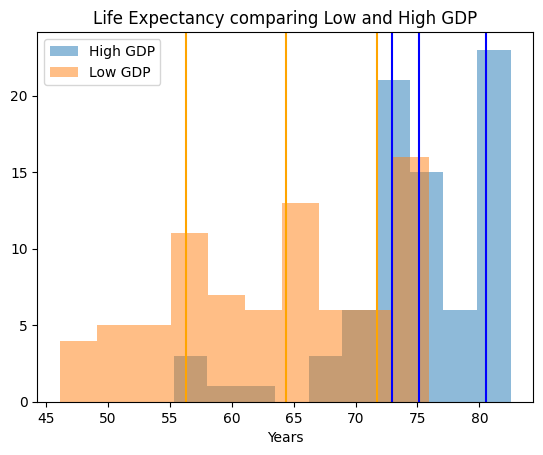

In [22]:
plt.hist(high_gdp["Life Expectancy"], alpha = 0.5, label = "High GDP")
plt.hist(low_gdp["Life Expectancy"], alpha = 0.5, label = "Low GDP")
for quartile in low_gdp_quartiles:
    plt.axvline(x = quartile, c = 'orange')
for quartile in high_gdp_quartiles:
    plt.axvline(x = quartile, c = 'blue')
plt.legend()
plt.title('Life Expectancy comparing Low and High GDP')
plt.xlabel('Years')
plt.show()

Let's say we consider a country that has a life expectancy of `70` years. If that country is in the top half of GDP countries, it would be in **Q1**, whilst if it were in the bottom half of GDP countries, it would be in **Q3**.